In [ ]:
'''
LESSION 2

- Reading from TXT 
- Exporting to TXT 
- Selecting top/bottom records 
- Descriptive statistics 
- Grouping/sorting data
'''

In [2]:
# Import all libraries needed for the tutorial
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [3]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 2.7.13 |Anaconda 4.3.0 (64-bit)| (default, Dec 19 2016, 13:29:36) [MSC v.1500 64 bit (AMD64)]
Pandas version 0.19.2
Matplotlib version 2.0.0


In [109]:
'''
Create Data
'''
# Lista inicial de los nombres de los bebes
names = ['Bob','Jessica','Mary','John','Mel']

In [110]:
'''
    Vamos a generar aleatoriamente 1000 bebes
    Existen diferentes funciones:
    + seed
    + randint
    + len
    + range
    + zip
'''

'\n    Vamos a generar aleatoriamente 1000 bebes\n    Existen diferentes funciones:\n    + seed\n    + randint\n    + len\n    + range\n    + zip\n'

In [5]:
# This will ensure the random samples below can be reproduced. 
# This means the random samples will always be identical.

random.seed?

In [13]:
range?

In [111]:
#Creamos la semilla
random.seed(500)

random_names = [names[random.randint(low=0,high=len(names))] for i in range(1000)]

len(random_names)

1000

In [112]:
# The number of births per name for the year 1880
births = [random.randint(low=0,high=1000) for i in range(1000)]
births[:10]

[968, 155, 77, 578, 973, 124, 155, 403, 199, 191]

In [113]:
# The number of births per name for the year 1880
births = [random.randint(low=0,high=1000) for i in range(1000)]
births[:10]

[905, 52, 796, 217, 874, 161, 605, 230, 593, 464]

In [114]:
BabyDataSet = list(zip(random_names,births))
BabyDataSet[:10]

[('Mary', 905),
 ('Jessica', 52),
 ('Jessica', 796),
 ('Bob', 217),
 ('Jessica', 874),
 ('Jessica', 161),
 ('Jessica', 605),
 ('Mary', 230),
 ('Mary', 593),
 ('Mary', 464)]

In [115]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df[:10]

,Names,Births
0,Mary,905
1,Jessica,52
2,Jessica,796
3,Bob,217
4,Jessica,874
5,Jessica,161
6,Jessica,605
7,Mary,230
8,Mary,593
9,Mary,464


In [80]:
df.to_csv?

In [116]:
df.to_csv('births1880.txt',index=False,header=False)

In [117]:
'''
Get Data
'''

pd.read_csv?

In [118]:
Location = r'C:\Users\cr\Documents\UCM 4\MD\teamMin\tutorial_pandas\births1880.txt'
df = pd.read_csv(Location)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
Mary    999 non-null object
766     999 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [119]:
df.head()

,Mary,905
0,Jessica,52
1,Jessica,796
2,Bob,217
3,Jessica,874
4,Jessica,161


In [120]:
df = pd.read_csv(Location, header=None,  names=['Names','Births'])
df.head(5)

,Names,Births
0,Mary,905
1,Jessica,52
2,Jessica,796
3,Bob,217
4,Jessica,874


In [121]:
import os
os.remove(Location)

In [122]:
'''
Prepare Data
'''
# Method 1:
df['Names'].unique()

array(['Mary', 'Jessica', 'Bob', 'John', 'Mel'], dtype=object)

In [123]:
# If you actually want to print the unique values:
for x in df['Names'].unique():
    print(x)

Mary
Jessica
Bob
John
Mel


In [96]:
# Method 2:
print(df['Names'].describe())

count     1000
unique       5
top        Bob
freq       206
Name: Names, dtype: object


In [97]:
df.groupby?

In [124]:
# Create a groupby object
name = df.groupby('Names')

# Apply the sum function to the groupby object
df = name.sum()
df

,Births
Names,
Bob,98759
Jessica,96622
John,98353
Mary,94866
Mel,104818


In [125]:
'''
Analyze Data
'''
# Method 1:
Sorted = df.sort_values(['Births'], ascending=False)
Sorted.head(1)

,Births
Names,
Mel,104818


In [131]:
# Method 2:
df['Births'].max()

104818

The most popular name


,Births
Names,
Mel,104818
Bob,98759
John,98353
Jessica,96622
Mary,94866


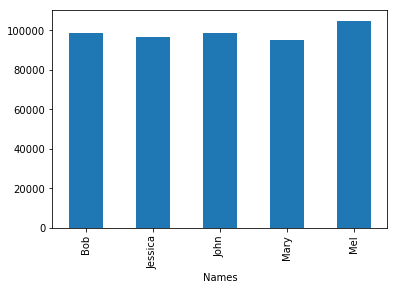

In [132]:
'''
Present Data
'''

# Create graph
df['Births'].plot.bar()

print("The most popular name")
df.sort_values(by='Births', ascending=False)